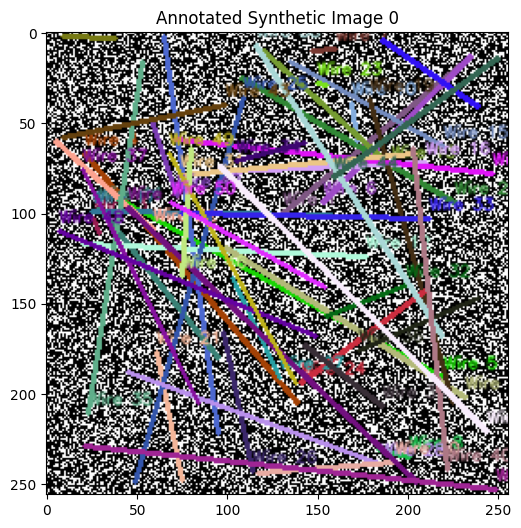

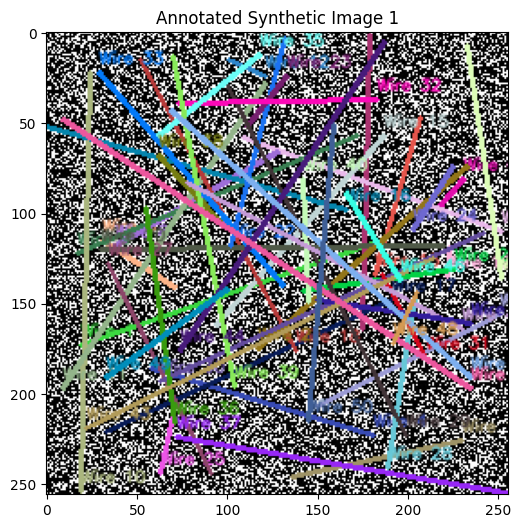

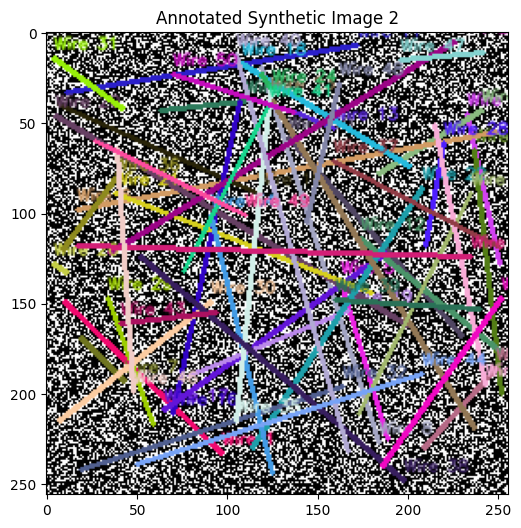

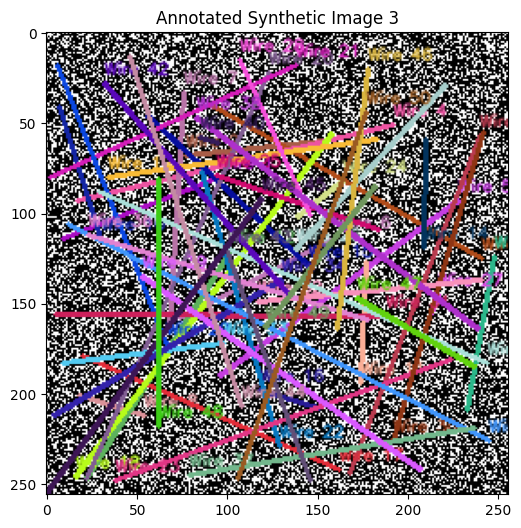

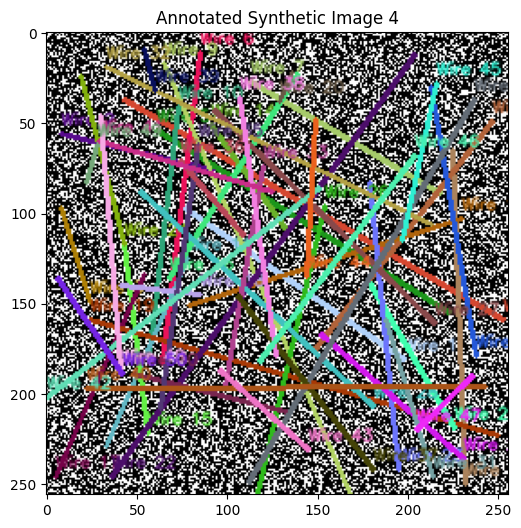

Saved 1000 synthetic SEM images in synthetic_sem_images
Saved 1000 annotated SEM images in synthetic_sem_images_annotated


In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Directories to save synthetic SEM images
synthetic_output_dir = "synthetic_sem_images"
annotated_output_dir = "synthetic_sem_images_annotated"

# Create directories if they don't exist
os.makedirs(synthetic_output_dir, exist_ok=True)
os.makedirs(annotated_output_dir, exist_ok=True)

# Function to generate random colors
def generate_random_color():
    """
    Generate a random color in BGR format.
    """
    return tuple(np.random.randint(0, 256, 3).tolist())

# Function to generate and save synthetic SEM images
def generate_synthetic_sem_image(image_size=(256, 256), num_nanowires=50):
    """
    Generate a synthetic SEM-like image with random nanowire patterns.
    """
    image = np.zeros(image_size, dtype=np.uint8)

    labels = []  # Store the start and end points for labeling

    for wire_idx in range(num_nanowires):
        # Random start and end points for "nanowires"
        x1, y1 = np.random.randint(0, image_size[1]), np.random.randint(0, image_size[0])
        x2, y2 = np.random.randint(0, image_size[1]), np.random.randint(0, image_size[0])

        # Draw a white line (simulating a nanowire)
        thickness = np.random.randint(1, 3)  # Random thickness
        cv2.line(image, (x1, y1), (x2, y2), color=255, thickness=thickness)

        # Store the start and end points with a random color
        labels.append(((x1, y1), (x2, y2), f"Wire {wire_idx + 1}", generate_random_color()))

    # Add random Gaussian noise
    noise = np.random.normal(0, 3, image_size).astype(np.uint8)
    noisy_image = cv2.add(image, noise)

    return noisy_image, labels

# Function to annotate an image with colored labels and underlines
def annotate_image(image, labels):
    """
    Annotate the image with labels and underline nanowires in unique colors.
    """
    annotated_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored text and lines
    for start, end, label, color in labels:
        x, y = start
        x2, y2 = end
        
        # Draw the underline (nanowire color)
        cv2.line(annotated_image, (x, y), (x2, y2), color=color, thickness=2)
        
        # Add the label near the starting point
        cv2.putText(
            annotated_image, label, (x, y - 5), 
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
            fontScale=0.3, color=color, thickness=1, lineType=cv2.LINE_AA
        )
    return annotated_image

# Generate and save synthetic SEM images
num_synthetic_images = 1000
for i in range(num_synthetic_images):
    # Generate image and labels
    synthetic_image, labels = generate_synthetic_sem_image(image_size=(256, 256), num_nanowires=50)
    
    # Save unannotated image
    unannotated_path = os.path.join(synthetic_output_dir, f"synthetic_{i:03d}.png")
    cv2.imwrite(unannotated_path, synthetic_image)
    
    # Annotate image and save
    annotated_image = annotate_image(synthetic_image, labels)
    annotated_path = os.path.join(annotated_output_dir, f"synthetic_annotated_{i:03d}.png")
    cv2.imwrite(annotated_path, annotated_image)

    # Display a few synthetic images
    if i < 5:  # Display only the first 5 images for preview
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title(f"Annotated Synthetic Image {i}")
        plt.show()

print(f"Saved {num_synthetic_images} synthetic SEM images in {synthetic_output_dir}")
print(f"Saved {num_synthetic_images} annotated SEM images in {annotated_output_dir}")


ERROR:root:Failed to load image: synthetic_sem_images\.ipynb_checkpoints


Found 1001 files in the directory.
Processing image: synthetic_000.png
Processing image: synthetic_001.png
Processing image: synthetic_002.png
Processing image: synthetic_003.png
Processing image: synthetic_004.png
Processing image: synthetic_005.png
Processing image: synthetic_006.png
Processing image: synthetic_007.png
Processing image: synthetic_008.png
Processing image: synthetic_009.png
Processing image: synthetic_010.png
Processing image: synthetic_011.png
Processing image: synthetic_012.png
Processing image: synthetic_013.png
Processing image: synthetic_014.png
Processing image: synthetic_015.png
Processing image: synthetic_016.png
Processing image: synthetic_017.png
Processing image: synthetic_018.png
Processing image: synthetic_019.png
Processing image: synthetic_020.png
Processing image: synthetic_021.png
Processing image: synthetic_022.png
Processing image: synthetic_023.png
Processing image: synthetic_024.png
Processing image: synthetic_025.png
Processing image: synthetic_0

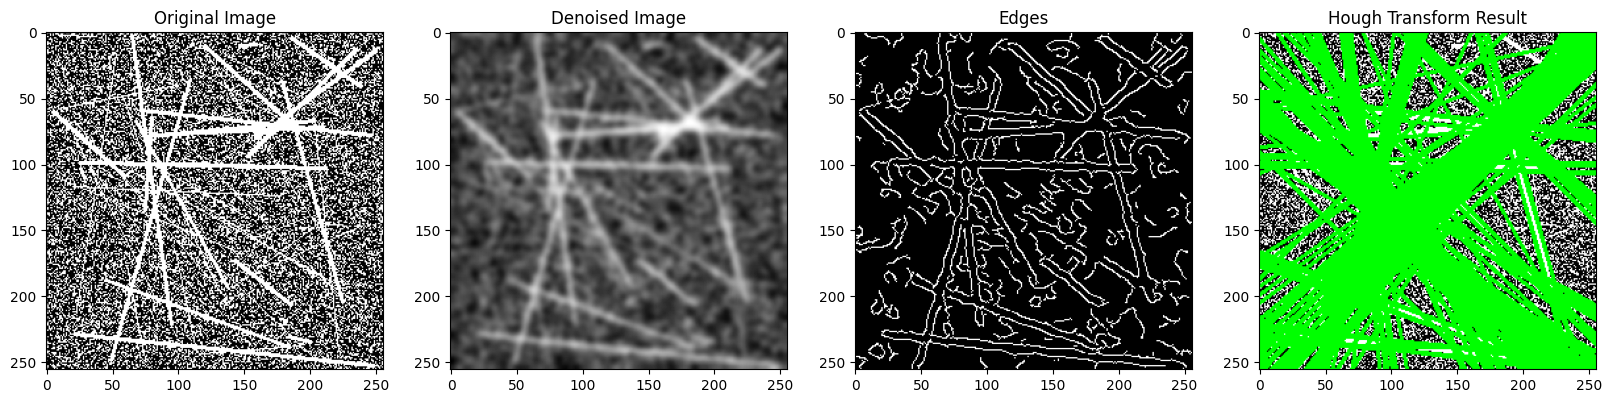

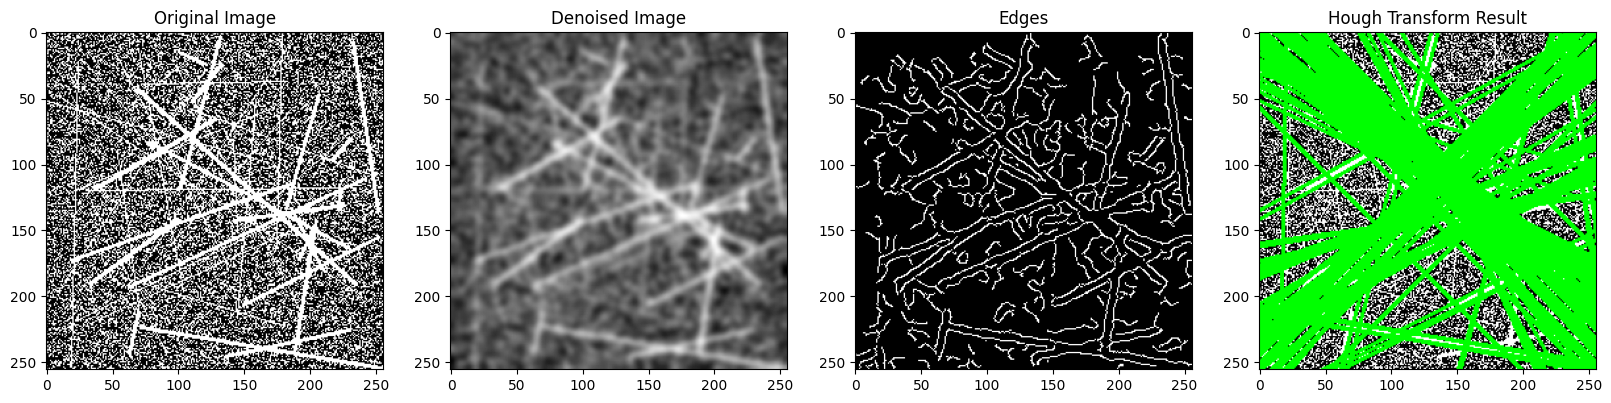

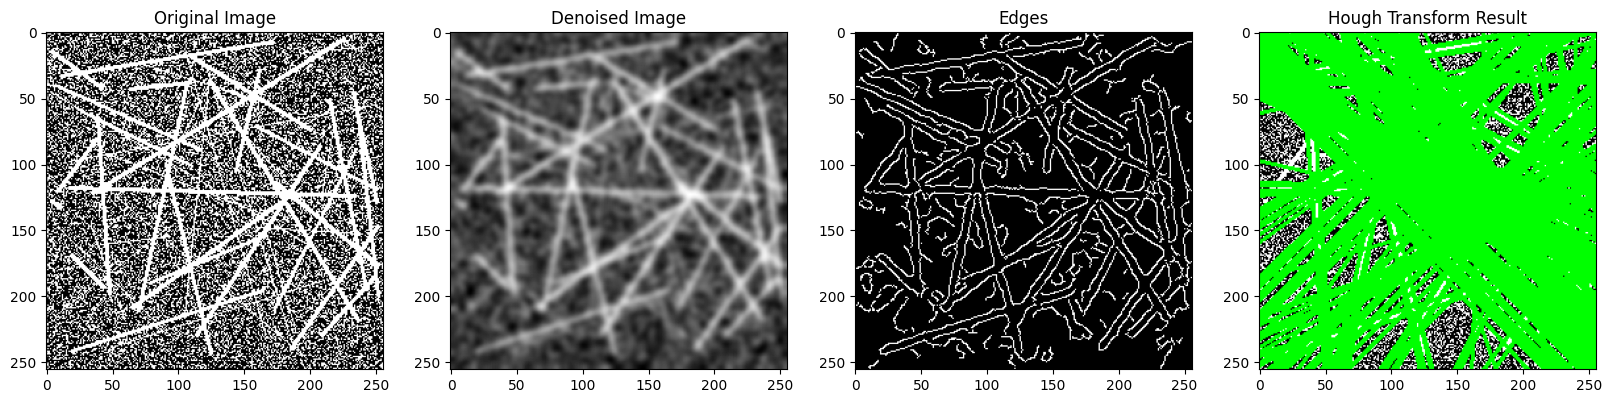

Processed 1000 images and displayed 3 of them.


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import logging

# Configure logging for error tracking
logging.basicConfig(level=logging.ERROR)

# Directory where synthetic SEM images are saved
synthetic_output_dir = "synthetic_sem_images"

# Initialize list to hold processed images
processed_images = []

# Check if the directory exists
if not os.path.exists(synthetic_output_dir):
    print(f"Directory '{synthetic_output_dir}' does not exist. Please check the path.")
    exit()

# Get a list of all synthetic images
synthetic_image_files = sorted(os.listdir(synthetic_output_dir))
print(f"Found {len(synthetic_image_files)} files in the directory.")

# Process all images
for image_file in synthetic_image_files:
    # Construct the full path to the image
    image_path = os.path.join(synthetic_output_dir, image_file)
    
    # Load the synthetic image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded successfully
    if image is None:
        logging.error(f"Failed to load image: {image_path}")
        continue  # Skip to the next file if the image is not loaded

    print(f"Processing image: {image_file}")
    
    # Step 1: Noise reduction
    # Option 1: Gaussian Blur
    denoised_image = cv2.GaussianBlur(image, (15, 15), 0)
    
    # Option 2: Median Filtering (Uncomment the next line to use this)
    # denoised_image = cv2.medianBlur(image, 15)
    
    # Option 3: Bilateral Filtering (Uncomment the next line to use this)
    # denoised_image = cv2.bilateralFilter(image, 9, 75, 75)
    
    # Step 2: Edge detection using Canny
    edges = cv2.Canny(denoised_image, threshold1=50, threshold2=100, apertureSize=3)
    
    # Step 3: Hough Line Transform
    lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=60)
    
    # Create a copy of the original image for visualization
    line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Append the processed image
    processed_images.append((image, denoised_image, edges, line_image))

# Check if any images were processed
if not processed_images:
    print("No valid images were processed.")
    exit()

# Display results for only 3 images
for idx, (original, denoised, edges, line_image) in enumerate(processed_images[:3]):
    plt.figure(figsize=(20, 5))
    
    # Original Image
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    
    # Denoised Image
    plt.subplot(1, 4, 2)
    plt.title("Denoised Image")
    plt.imshow(denoised, cmap='gray')
    
    # Edges
    plt.subplot(1, 4, 3)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')
    
    # Hough Transform Result
    plt.subplot(1, 4, 4)
    plt.title("Hough Transform Result")
    plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
    
    plt.show()

print(f"Processed {len(processed_images)} images and displayed 3 of them.")


In [ ]:
#NEED TO COMPLETE THE CODE